# Multiple layer neural network and back propagation

## 1. Neurons 

Neurons are essentially the same as perceptron, only whenm we talk about perceptron, their activation function is step function; While when we talk about neurons,  the activation function usually choose sigmoid function or tanh function. As shown in the figure below:

![neuron](images/neuron.gif)

The way to calculate the output of a neurons and calculate the output of perceptron is the same. Assume that the input of nurons is vector $\vec{x}$, and weight vector is $\vec{w}$(bias term is $w_0$), activation function is sigmoid function, then the output of y is:

$$
y = sigmod(\vec{w}^T \cdot \vec{x})
$$

The definitation of sigmoid function is as following：
$$
sigmod(x) = \frac{1}{1+e^{-x}}
$$

Put this into the former formula, we obtain:

$$
y = \frac{1}{1+e^{-\vec{w}^T \cdot \vec{x}}}
$$

Sigmoid is a nolinear function, the domain is (0,1). The function of grapgh is shown as following:


![sigmod_function](images/sigmod.jpg)

The derivative of sigmoid function is：
\begin{eqnarray}
y & = & sigmod(x) \tag{1} \\
y' & = & y(1-y)
\end{eqnarray}

We can see that the derivative of sigmoid function is very interesting, it can use sigmoid function itself to represent. In this way, once the value of sigmoid funtion is being calcualted, it is very convenient to calculate the value of its derivative.



## 2. What is neural network?

![nn1](images/nn1.jpeg)

Neural is actually multiple neurons connected according to certain rules. The upper graph shows a fully connected neural networks. By observing the upper graph, we can find the rule of it including:

* Neurons are laid out in layers. The leftmost layer, called the input layer, receives input data; The rightmost layer is called the output layer, from which we can get the neural network output data. The layers between the input and output layers are called hidden layers because they are not visible to the outside world.
* Neurons in the same layer do not have connection with each other.
* All the neurons in Nth layer is connect to all neurons in N-1 layer(this is the meaning of full connected), the output of N-1 layer neurons is the input of N layer's input.
* Every connection has a weigth.

All the rules defined the construction of fully connected neural networks. In fact, there exist many other kind of construction neural network, such as CNN, RNN, they all have different connect rules.



## 3. Calculate the out put of neurons

Neural network is actually a function represent the process from input vector $\vec{x}$ to output vector $\vec{y}$, which is:

$$
\vec{y} = f_{network}(\vec{x})
$$

According to the input, we can calculate the output of neural network. We need firstly assign each value of element in the input vector to the correspond neurons in the output layer. Then, according to the formula, 1 we forward calculate the value of each neurons in every layer until the value of neurons in the last output layer is all calculated. Finally, we can get the output vector of $\vec{y}$ by combining every vlaue of neurons together

Next we will list an example to show this process. Noting every element firstly in the neural network is necessary.

![nn2](images/nn2.png)

As shown in the upper graph, there are three node in the input layer, we note them 1, 2, 3 in turn. The 4 nodes of the hidden layer are numbered 4, 5, 6, and 7, respectively. The last two node in the output layer is 8 and 9. Because our neural network is fully connected network, so we can see that each node is connected to all the nodes in the previous layer. For example, we can see the node 4 in the hidden layer, they have connection with the three node(1, 2, 3) in the input layer. The weight on the connection is $w_{41}$,$w_{42}$,$w_{43}$ respectively. Then, how can we calculate the output value of node 4?

In order to calculate the output value of node 4, we must firstly get the output value of all the other upstream node(which is node 1, 2, 3). Node 1, 2, 3 is the input layer node, so that their output value is the input vector $\vec{x}$ itself. According to the corresponding relationship in the upper graph, we can see that the output value of node 1, 2, 3 is $x_1$,$x_2$,$x_3$ respectively. We want the dimension of input vector is the same with input neurons, while the element of input vector can be free to decide which corresponds to the input nodes. It's also perfectly fine if you want to assign $x_1$ to node 2, however this will have no meaning without mistaking your self.

Once we have the output value of node 1, 2 and 3, we can calculate the output value $a_4$ of node 4 according to formula 1.

![eqn_3_4](images/eqn_3_4.png)

The $w_{4b}$ of above formula is the bias term of node 4, without drawing in the graph. While $w_{41}$,$w_{42}$,$w_{43}$are the weights of node 1, 2, 3 and 4 connections, respectively. When we note weight $w_{ji}$, We put the destination node number $j$ first and the source node number $i$ after.

Similarly, we can continue to calculate the output value $a_5$,$a_6$,$a_7$ of node 5, 6, 7. In this way, the output values of the four nodes in the hidden layer are calculated and we can calculate the output value of node 8 of the output layer, $y_1$:

![eqn_5_6](images/eqn_5_6.png)

In the same way, we can also calculate the value of $y_2$. Thus, all the output value of the output layer node is calculated.  When we get the input vector $\vec{x} = (x_1, x_2, x_3)^T$, the output vector of neural network is $\vec{y} = (y_1, y_2)^T$. We also see that the dimension of output vector is the same with the number of neurons.




## 4. A matrix representation of a neural network

The calculation of neural network will be very convenient if we use matrix to represent. Let's check the representation of the hidden layer.

First, we arrange the calculation of the four nodes of the hidden layer in order：

![eqn_hidden_units](images/eqn_hidden_units.png)

Next, define the input vector of the net $\vec{x}$ and each node weight vector $\vec{w}$ in the hidden layer. We let:

![eqn_7_12](images/eqn_7_12.png)

Substitute into the previous set of expressions, and get:

![eqn_13_16](images/eqn_13_16.png)

Now, we put the four formula that calculated $a_4$, $a_5$,$a_6$,$a_7$ into one matrix, each formula worked as one row of matrix so that we can use matrix to represent their calculation. Let:

![eqn_matrix1](images/eqn_matrix1.png)

Substitute into former group of formula we can get:

![formular_2](images/formular_2.png)

In formula 2, $f$ is the activation function, in this instance, it is $sigmod$ function. $W$ is the weight matrix of one layer. $\vec{x}$ is the input vector of some layer. $\vec{a}$ is the output vector of some layer. Formula 2 shows that the function of each layer of the neural network is to first multiply the input vector left by an array for linear transformation to obtain a new vector, and then apply an activation function to this vector element by element.

The algorithm in each layer is the same. For example, for a neural network that contains one input layer, one output layer and three hidden layer, we assume that their weight matrix is $W_1$,$W_2$,$W_3$,$W_4$ respectively. Every hidden layer output is $\vec{a}_1$,$\vec{a}_2$,$\vec{a}_3$ respectively, the input of neural network is $\vec{x}$, and the output of neural network is $\vec{y}$. As shown in the figure below:

![nn_parameters_demo](images/nn_parameters_demo.png)

The calculation of output vector in each layer can be represent as:

![eqn_17_20](images/eqn_17_20.png)

This is the matrix calculation method of neural network output value.

If written as a formula:
$$
\vec{y} = f(W4 \cdot f(W3 \cdot f(W2 \cdot f(W1 \cdot \vec{x}))))
$$

The process of neural network forward calculation is relatively simple, that is, it is ok to keep doing the calculation layer by layer. The dynamic demonstration is shown in the figure below

![](images/nn-forward.gif)

## 5. The training of neural network - Back propagation algorithm 

Now, we need to know how to get the weight in every connection of neural networks. We can say that neural network is a model, then theses weight is the parameter of the model, which is the thing that model need to learn. However, such parameters as the connection mode of a neural network, the number of layers of the network, and the number of nodes in each layer are not learned, but artificially set in advance. For these parameter that setted in advance, we call it Hyper-Parameters.

Back propagation algorithm is actually the application of chain rule. However, this simple and obvious method was invented and popularized nearly 30 years after Roseblatt proposed the perceptron algorithm. For this, Bengio answered:

> Many ideas that seem obvious become obvious only in hindsight.

According to the general routine of machine learning, we first determine the objective function of the neural network, and then use the stochastic gradient descent optimization algorithm to calculate the parameter value of the minimum objective function

We take the sum of error square of all the output layer in the network as the target function:

![bp_loss](images/bp_loss.png)

Among them $E_d$ is the error of sample.

After that, we can use random gradient descent method to optimize the target function.

![bp_weight_update](images/bp_weight_update.png)

The random gradient descent algorithm is to find the partial derivative of the error $E_d$with respect to each weight $w_{ji}$, how to find it?

![nn3](images/nn3.png)

Observing the upper graph, we find that weight $w_{ji}$ can only affect the other parts of the network through the input of node $j$, set $net_j$  as the weighted input of node $j$, therefore:

![eqn_21_22](images/eqn_21_22.png)

$E_d$ is the function of $net_j$, while $net_j$ is the function of $w_{ji}$. According to the chain rule, we can get:

![eqn_23_25](images/eqn_23_25.png)

In the upper formula, $x_{ji}$ is the input value that node $i$ pass to node $j$, which is the output value of node $i$.  

About the derivation of formula $\frac{\partial E_d}{\partial net_j}$, we need to distinguish the two case between input layer and hidden layer.



### 5.1 The training of propagation layer

![nn3](images/nn3.png)

For output layer, $net_j$ can only affect the other parts of the net through affecting the output value $net_j$ of node $j$, which means that $E_d$ is the function of $y_j$ while $y_j$ is the function of $net_j$, among them $y_j = sigmod(net_j)$. Therefore we can use chain rule again:

![eqn_26](images/eqn_26.png)

Consdering about the first term of the upper formula

![eqn_27_29](images/eqn_27_29.png)

Considering about the second term of the formula:

![eqn_30_31](images/eqn_30_31.png)

Combine the first and second term together, we get:

![eqn_ed_net_j.png](images/eqn_ed_net_j.png)

If we let $\delta_j = - \frac{\partial E_d}{\partial net_j}$, so that a node error term $\delta$ is the negative of the partial derivative of the network error with respect to the input to this node. Substitute into the upper formula, we get:

![eqn_delta_j.png](images/eqn_delta_j.png)

Put the derive result into random gradient descent formula, we get:

![eqn_32_34.png](images/eqn_32_34.png)


### 5.2　The training of the weight in hidden layer

Now, we need to derive the $\frac{\partial E_d}{\partial net_j}$ of hidden layer.

![nn3](images/nn3.png)

Firstly, we need to define the set as all the direct downstream node $Downstream(j)$ of node $j$. For exmaple, to node 4, the downstream of it is node 8 and 9. We can see that $net_j$ can noly affect $E__c$ by affecting $Downstream(j)$. Set $net_k$ as the downstream node input of node $j$, then $E_d$ is the function of $net_k$, while $net_k$ is the function of $net_j$. Beacuse there are many $net_k$, we should apply full derivative formula to do the derivative as following:

![eqn_35_40](images/eqn_35_40.png)

Because $\delta_j = - \frac{\partial E_d}{\partial net_j}$, put this into the upper formula we can get:

![eqn_delta_hidden.png](images/eqn_delta_hidden.png)

At here, we have derive the backward propagation algoritm. One thing to note, the trian rule that we derived just now is  according to the activation function of sigmoid function, square sum error, fully connected network, ramdom gradient descent optimization algorithm. If we have diferent activation function, error calculation mode, net connection strucutre and optimization, we will have different training rules. Whatever, it is all the same in the derivation of training rules, we noly need to use the chain rule do the derivaiton.


###  5.3 The specific explanation

We assume that evey training sample is $(\vec{x}, \vec{t})$, among them vector $\vec{x}$ is the characteristic of training sample, while $\vec{t}$ is the target value of sample.

![nn3](images/nn3.png)

Firstly, we use the characteristic of the sample $\vec{x}$ to calculate the output $a_i$ of every hidden node in neural network and every output value of output layer, according to the algorithm that we introduced in last section. 

Then, we calculate every node error term $\delta_i$ according to the following method:

* **For output layer node $i$**

![formular_3.png](images/formular_3.png)

Among them, $\delta_i$is the error term of node $i$, $y_i$ is the output value of node $i$. For example, according to the upper graph, the output layer node 8 have output value $y_1$, while the target value of smaple is $t_1$, substitute into upper formula we get the error term of node 8:

![forumlar_delta8.png](images/forumlar_delta8.png)

* **For hidden layer node**

![formular_4.png](images/formular_4.png)

Among them, $a_i$ is the output value of node $i$, while $w_{ki}$ is the weight that node $i$ connect to it's next layer $k$. $\delta_k$ is the next layer error term of node $i$. For example, for hidden layer node 4, the calcultaion method is as following:

![forumlar_delta4.png](images/forumlar_delta4.png)

At last, update weight of every connection.

![formular_5.png](images/formular_5.png)

Among them, $w_{ji}$ is the weight from node $i$ to node $j$, $\eta$ is a constant that represent the learning rate, $\delta_j$ is the error term of node $j$, while $x_{ji}$ is the output that node $i$ pass to node $j$.
For example, the update way of weight $w_{84}$ is as following:

![eqn_w84_update.png](images/eqn_w84_update.png)

Similarly, the update method of weight $w_{41}$ is as following:

![eqn_w41_update.png](images/eqn_w41_update.png)

The input value of bias term is always one. For example, the bias term of node 4 $w_{4b}$should be calculated according to the following method.

![eqn_w4b_update.png](images/eqn_w4b_update.png)

We have introduced the calculation method and weight updating method for each node error term of neural network. Apparently, to calculate the error term of a node, you need to first calculate the error term of each node connected to the next layer. This requires that the error terms be calculated in order from the output layer and then in reverse order for each hidden layer until the hidden layer is connected to the input layer. This is the meaning of the name backward propagation algorithm. When all the node error term are calculated, we can update all the weight according to formula 5.



## 6. Why we use activation function
Activation function is very important in neural network and it is also important to use activation function. We get to konw the activation funciton in the former section from the perspective of human neurons. The neuron need to propagate backward thorough activation, therefore activation is needed in neural networks, we will understand the necessity of the activation function from math perspective.

For a to layer neural network network, if we use A represent activation, then:

$$
y = w_2 A(w_1 x)
$$

If we do not use activation function, then the result of neural work is:

$$
y = w_2 (w_1 x) = (w_2 w_1) x = \bar{w} x
$$

We can see that we combined the two layer neural network parameter together, represented in $\bar{w}$, so that the two layer network is actually one layer neural network while the parameter changes to new $\bar{w}$. Therefore, if we do not use activation function, whatever how many layer neural network we have, $y = w_n \cdots w_2 w_1 x = \bar{w} x$ is changing into a one layer network, so that we must use activation function in every layer.

Finally, let's look at the effects of activation functions on neural networks:

![](images/nn-activation-function.gif)

We can see that when we use the activation, the neurak network can change into any shapes by changing weght, the more complicated neural network can fit more complicate shapes, which is known as the universal approximation theorem for neural networks.The activation function that used in neural network are all nolinear, every time the acitvaiton funciton input a value, we will get a result through a special math calculation. 

### 6.1 sigmoid activation function

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

![](images/act-sigmoid.jpg)

### 6.2 tanh activation

$$tanh(x) = 2 \sigma(2x) - 1$$

![](images/act-tanh.jpg)

### 6.3 ReLU activation

$$ReLU(x) = max(0, x)$$

![](images/act-relu.jpg)

When the input $x<0$, the output is $0$, while for $x> 0$, the output is $x$. This activation function make network converge rapaidly. It does not saturate, that is, it can resist gradient disappearance, at least in the positive region ($x> 0$). Therefore, neuron will not back propagate all the zero at at least half of the region. Because we use the simple thresholding, the RelU will have a high calculation efficiency.

In the network, the different input may contains key characteristic of differrent size, and it will be more flexible if we use the changeable data structure as the container. Assume that the neurons have sparse characteristic, then for different activation way: different numbers(Selective inactivation), different function(Distributed activation). The activation paths generated by the two optimizable structures can better learn the relatively sparse features from the dimension of the effective data and play an automatic de-separation effect. 

![](images/nn-sparse.png)

In deep neural network, the dependence to nolinear is much less. What's more, sparse characteristic do not require the network have strong processing linear inseparability mechanism. Therefore, in the deep learning model, it is more suitable to use simple, quickly linear activation function. As shown in the figure, once the activation changes linearly from neuron to neuron, the nonlinear part of the network only comes from the partial selective activation of the neuron. 

Another reason that we are more prone to use linear activation function is to reduce the Vanishing Gradient Problem when trianing deep netwrok with gradient method.


Those of you who have seen the BP derivation know that when you calculate the gradient from the back propagation of the error from the output layer, you multiply the input neuron value of the current layer at each layer to get the first derivative of the activation function.

$$
grad = error ⋅ sigmoid'(x) ⋅ x
$$

There are two problems with using the Sigmoid family of bi-terminal saturation (that is, the range is limited) functions:

1. sigmoid'(x) ∈ (0,1)  Derivative zoom
2. x∈(0,1)或x∈(-1,1)  Saturation scaling


In this way, when passing through each layer, the Error will decay exponentially. Once the recursive multi-layer back propagation is carried out, the gradient will constantly decay and disappear, making the network learning slow down. The gradient of the corrected activation function is 1, and only one end is saturated. The gradient flows well in the back propagation, and the training speed is greatly improved.

## 7. The demo program

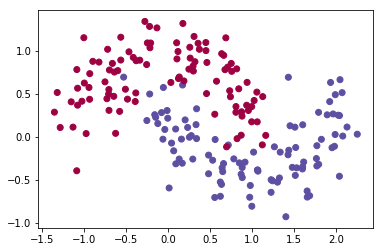

In [1]:
% matplotlib inline

import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# generate sample data
np.random.seed(0)
X, y = datasets.make_moons(200, noise=0.20)

# generate nn output target
t = np.zeros((X.shape[0], 2))
t[np.where(y==0), 0] = 1
t[np.where(y==1), 1] = 1

# plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

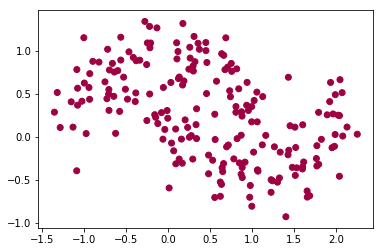

In [2]:
# generate the NN model
class NN_Model:
    epsilon = 0.01               # learning rate
    n_epoch = 1000               # iterative number
    
nn = NN_Model()
nn.n_input_dim = X.shape[1]      # input size
nn.n_output_dim = 2              # output node size
nn.n_hide_dim = 4                # hidden node size

nn.X = X
nn.y = y    

# initial weight array
nn.W1 = np.random.randn(nn.n_input_dim, nn.n_hide_dim) / np.sqrt(nn.n_input_dim)
nn.b1 = np.zeros((1, nn.n_hide_dim))
nn.W2 = np.random.randn(nn.n_hide_dim, nn.n_output_dim) / np.sqrt(nn.n_hide_dim)
nn.b2 = np.zeros((1, nn.n_output_dim))

# defin sigmod & its derivate function
def sigmod(X):
    return 1.0/(1+np.exp(-X))

def sigmod_derivative(X):
    f = sigmod(X)
    return f*(1-f)

# network forward calculation
def forward(n, X):
    n.z1 = sigmod(X.dot(n.W1) + n.b1)
    n.z2 = sigmod(n.z1.dot(n.W2) + n.b2)
    return n


# use random weight to perdict
forward(nn, X)
y_pred = np.argmax(nn.z2, axis=1)

# plot data
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Spectral)
plt.show()

In [3]:
# FIXME: change variable name to math

from sklearn.metrics import accuracy_score

y_true = np.array(nn.y).astype(float)

# back-propagation
def backpropagation(n, X, y):
    for i in range(n.n_epoch):
        # forward to calculate each node's output
        forward(n, X)
        
        # print loss, accuracy
        L = np.sum((n.z2 - y)**2)
        
        y_pred = np.argmax(nn.z2, axis=1)
        acc = accuracy_score(y_true, y_pred)
        
        print("epoch [%4d] L = %f, acc = %f" % (i, L, acc))
        
        # calc weights update
        d2 = n.z2*(1-n.z2)*(y - n.z2)
        d1 = n.z1*(1-n.z1)*(np.dot(d2, n.W2.T))
        
        # update weights
        n.W2 += n.epsilon * np.dot(n.z1.T, d2)
        n.b2 += n.epsilon * np.sum(d2, axis=0)
        n.W1 += n.epsilon * np.dot(X.T, d1)
        n.b1 += n.epsilon * np.sum(d1, axis=0)

nn.n_epoch = 2000
backpropagation(nn, X, t)


epoch [   0] L = 103.723994, acc = 0.500000
epoch [   1] L = 99.572368, acc = 0.500000
epoch [   2] L = 96.298444, acc = 0.695000
epoch [   3] L = 93.755262, acc = 0.745000
epoch [   4] L = 91.723534, acc = 0.725000
epoch [   5] L = 90.013431, acc = 0.710000
epoch [   6] L = 88.493838, acc = 0.720000
epoch [   7] L = 87.084077, acc = 0.740000
epoch [   8] L = 85.737551, acc = 0.755000
epoch [   9] L = 84.428420, acc = 0.760000
epoch [  10] L = 83.142909, acc = 0.770000
epoch [  11] L = 81.874127, acc = 0.775000
epoch [  12] L = 80.619101, acc = 0.775000
epoch [  13] L = 79.377104, acc = 0.775000
epoch [  14] L = 78.148705, acc = 0.775000
epoch [  15] L = 76.935216, acc = 0.785000
epoch [  16] L = 75.738363, acc = 0.790000
epoch [  17] L = 74.560076, acc = 0.795000
epoch [  18] L = 73.402344, acc = 0.795000
epoch [  19] L = 72.267120, acc = 0.800000
epoch [  20] L = 71.156245, acc = 0.805000
epoch [  21] L = 70.071400, acc = 0.805000
epoch [  22] L = 69.014062, acc = 0.810000
epoch [  2

epoch [ 514] L = 38.675286, acc = 0.850000
epoch [ 515] L = 38.674843, acc = 0.850000
epoch [ 516] L = 38.674402, acc = 0.850000
epoch [ 517] L = 38.673963, acc = 0.850000
epoch [ 518] L = 38.673526, acc = 0.850000
epoch [ 519] L = 38.673090, acc = 0.850000
epoch [ 520] L = 38.672656, acc = 0.850000
epoch [ 521] L = 38.672224, acc = 0.850000
epoch [ 522] L = 38.671794, acc = 0.850000
epoch [ 523] L = 38.671365, acc = 0.850000
epoch [ 524] L = 38.670939, acc = 0.850000
epoch [ 525] L = 38.670514, acc = 0.850000
epoch [ 526] L = 38.670090, acc = 0.850000
epoch [ 527] L = 38.669669, acc = 0.850000
epoch [ 528] L = 38.669249, acc = 0.850000
epoch [ 529] L = 38.668830, acc = 0.850000
epoch [ 530] L = 38.668414, acc = 0.850000
epoch [ 531] L = 38.667999, acc = 0.850000
epoch [ 532] L = 38.667585, acc = 0.850000
epoch [ 533] L = 38.667173, acc = 0.850000
epoch [ 534] L = 38.666763, acc = 0.850000
epoch [ 535] L = 38.666354, acc = 0.850000
epoch [ 536] L = 38.665947, acc = 0.850000
epoch [ 537

epoch [ 976] L = 38.557584, acc = 0.850000
epoch [ 977] L = 38.557423, acc = 0.850000
epoch [ 978] L = 38.557262, acc = 0.850000
epoch [ 979] L = 38.557101, acc = 0.850000
epoch [ 980] L = 38.556941, acc = 0.850000
epoch [ 981] L = 38.556780, acc = 0.850000
epoch [ 982] L = 38.556620, acc = 0.850000
epoch [ 983] L = 38.556460, acc = 0.850000
epoch [ 984] L = 38.556301, acc = 0.850000
epoch [ 985] L = 38.556141, acc = 0.850000
epoch [ 986] L = 38.555982, acc = 0.850000
epoch [ 987] L = 38.555823, acc = 0.850000
epoch [ 988] L = 38.555664, acc = 0.850000
epoch [ 989] L = 38.555506, acc = 0.850000
epoch [ 990] L = 38.555347, acc = 0.850000
epoch [ 991] L = 38.555189, acc = 0.850000
epoch [ 992] L = 38.555032, acc = 0.850000
epoch [ 993] L = 38.554874, acc = 0.850000
epoch [ 994] L = 38.554717, acc = 0.850000
epoch [ 995] L = 38.554559, acc = 0.850000
epoch [ 996] L = 38.554402, acc = 0.850000
epoch [ 997] L = 38.554246, acc = 0.850000
epoch [ 998] L = 38.554089, acc = 0.850000
epoch [ 999

epoch [1441] L = 38.500131, acc = 0.845000
epoch [1442] L = 38.500034, acc = 0.845000
epoch [1443] L = 38.499936, acc = 0.845000
epoch [1444] L = 38.499839, acc = 0.845000
epoch [1445] L = 38.499742, acc = 0.845000
epoch [1446] L = 38.499644, acc = 0.845000
epoch [1447] L = 38.499547, acc = 0.845000
epoch [1448] L = 38.499450, acc = 0.845000
epoch [1449] L = 38.499353, acc = 0.845000
epoch [1450] L = 38.499257, acc = 0.845000
epoch [1451] L = 38.499160, acc = 0.845000
epoch [1452] L = 38.499063, acc = 0.845000
epoch [1453] L = 38.498966, acc = 0.845000
epoch [1454] L = 38.498870, acc = 0.845000
epoch [1455] L = 38.498773, acc = 0.845000
epoch [1456] L = 38.498677, acc = 0.845000
epoch [1457] L = 38.498581, acc = 0.845000
epoch [1458] L = 38.498484, acc = 0.845000
epoch [1459] L = 38.498388, acc = 0.845000
epoch [1460] L = 38.498292, acc = 0.845000
epoch [1461] L = 38.498196, acc = 0.845000
epoch [1462] L = 38.498100, acc = 0.845000
epoch [1463] L = 38.498004, acc = 0.845000
epoch [1464

epoch [1909] L = 38.460744, acc = 0.845000
epoch [1910] L = 38.460670, acc = 0.845000
epoch [1911] L = 38.460596, acc = 0.845000
epoch [1912] L = 38.460522, acc = 0.845000
epoch [1913] L = 38.460448, acc = 0.845000
epoch [1914] L = 38.460374, acc = 0.845000
epoch [1915] L = 38.460300, acc = 0.845000
epoch [1916] L = 38.460226, acc = 0.845000
epoch [1917] L = 38.460153, acc = 0.845000
epoch [1918] L = 38.460079, acc = 0.845000
epoch [1919] L = 38.460005, acc = 0.845000
epoch [1920] L = 38.459931, acc = 0.845000
epoch [1921] L = 38.459858, acc = 0.845000
epoch [1922] L = 38.459784, acc = 0.845000
epoch [1923] L = 38.459711, acc = 0.845000
epoch [1924] L = 38.459637, acc = 0.845000
epoch [1925] L = 38.459563, acc = 0.845000
epoch [1926] L = 38.459490, acc = 0.845000
epoch [1927] L = 38.459416, acc = 0.845000
epoch [1928] L = 38.459343, acc = 0.845000
epoch [1929] L = 38.459270, acc = 0.845000
epoch [1930] L = 38.459196, acc = 0.845000
epoch [1931] L = 38.459123, acc = 0.845000
epoch [1932

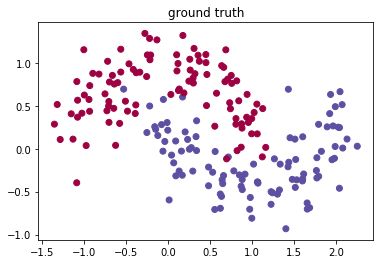

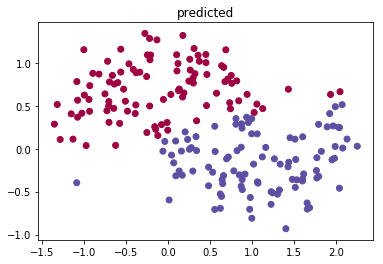

In [4]:
# plot data
y_pred = np.argmax(nn.z2, axis=1)

plt.scatter(X[:, 0], X[:, 1], c=nn.y, cmap=plt.cm.Spectral)
plt.title("ground truth")
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Spectral)
plt.title("predicted")
plt.show()


## 8. How to encapsulate a multi-layer neural network using class methods?

In [4]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# define sigmod
def sigmod(X):
    return 1.0/(1+np.exp(-X))


# generate the NN model
class NN_Model:
    def __init__(self, nodes=None):
        self.epsilon = 0.01                 # learning rate
        self.n_epoch = 1000                 # iterative number
        
        if not nodes:
            self.nodes = [2, 6, 2]          # default nodes size (from input -> output)
        else:
            self.nodes = nodes
    
    def init_weight(self):
        W = []
        B = []
        
        n_layer = len(self.nodes)
        for i in range(n_layer-1):
            w = np.random.randn(self.nodes[i], self.nodes[i+1]) / np.sqrt(self.nodes[i])
            b = np.random.randn(1, self.nodes[i+1])
            
            W.append(w)
            B.append(b)
            
        self.W = W
        self.B = B
    
    def forward(self, X):
        Z = []
        x0 = X
        for i in range(len(self.nodes)-1):
            z = sigmod(np.dot(x0, self.W[i]) + self.B[i])
            x0 = z
            
            Z.append(z)
        
        self.Z = Z
        return Z[-1]
        
    # back-propagation
    def backpropagation(self, X, y, n_epoch=None, epsilon=None):
        if not n_epoch: n_epoch = self.n_epoch
        if not epsilon: epsilon = self.epsilon
        
        self.X = X
        self.Y = y
        
        for i in range(n_epoch):
            # forward to calculate each node's output
            self.forward(X)

            self.evaluate()
            
            # calc weights update
            W = self.W
            B = self.B
            Z = self.Z
            
            D = []
            d0 = y
            n_layer = len(self.nodes)
            for j in range(n_layer-1, 0, -1):
                jj = j - 1
                z = self.Z[jj]
                
                if j == n_layer - 1:
                    d = z*(1-z)*(d0 - z)
                else:
                    d = z*(1-z)*np.dot(d0, W[j].T)
                    
                d0 = d
                D.insert(0, d)
            
            # update weights
            for j in range(n_layer-1, 0, -1):
                jj = j - 1
                
                if jj != 0:
                    W[jj] += epsilon * np.dot(Z[jj-1].T, D[jj])
                else:
                    W[jj] += epsilon * np.dot(X.T, D[jj])
                    
                B[jj] += epsilon * np.sum(D[jj], axis=0)
        
    def evaluate(self):
        z = self.Z[-1]
        
        # print loss, accuracy
        L = np.sum((z - self.Y)**2)
            
        y_pred = np.argmax(z, axis=1)
        y_true = np.argmax(self.Y, axis=1)
        acc = accuracy_score(y_true, y_pred)
        
        print("L = %f, acc = %f" % (L, acc))
        

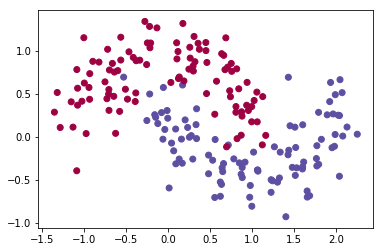

In [5]:
# generate sample data
np.random.seed(0)
X, y = datasets.make_moons(200, noise=0.20)

# generate nn output target
t = np.zeros((X.shape[0], 2))
t[np.where(y==0), 0] = 1
t[np.where(y==1), 1] = 1

# plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

In [6]:
# use the NN model and training
nn = NN_Model([2, 6, 4, 2])
nn.init_weight()
nn.backpropagation(X, t, 2000)



L = 121.621107, acc = 0.500000
L = 115.928422, acc = 0.500000
L = 111.304997, acc = 0.500000
L = 107.789222, acc = 0.500000
L = 105.265297, acc = 0.500000
L = 103.533617, acc = 0.500000
L = 102.380546, acc = 0.500000
L = 101.622557, acc = 0.500000
L = 101.121698, acc = 0.500000
L = 100.782803, acc = 0.510000
L = 100.543751, acc = 0.530000
L = 100.365372, acc = 0.540000
L = 100.223492, acc = 0.520000
L = 100.103371, acc = 0.475000
L = 99.996073, acc = 0.460000
L = 99.896185, acc = 0.465000
L = 99.800411, acc = 0.465000
L = 99.706725, acc = 0.495000
L = 99.613854, acc = 0.515000
L = 99.520981, acc = 0.560000
L = 99.427551, acc = 0.585000
L = 99.333171, acc = 0.630000
L = 99.237541, acc = 0.660000
L = 99.140415, acc = 0.690000
L = 99.041582, acc = 0.705000
L = 98.940844, acc = 0.710000
L = 98.838015, acc = 0.720000
L = 98.732913, acc = 0.740000
L = 98.625357, acc = 0.745000
L = 98.515164, acc = 0.755000
L = 98.402148, acc = 0.785000
L = 98.286120, acc = 0.790000
L = 98.166887, acc = 0.800

L = 38.142859, acc = 0.855000
L = 38.131586, acc = 0.855000
L = 38.120265, acc = 0.855000
L = 38.108895, acc = 0.855000
L = 38.097475, acc = 0.855000
L = 38.086004, acc = 0.855000
L = 38.074483, acc = 0.855000
L = 38.062909, acc = 0.855000
L = 38.051283, acc = 0.855000
L = 38.039603, acc = 0.855000
L = 38.027870, acc = 0.855000
L = 38.016082, acc = 0.855000
L = 38.004238, acc = 0.855000
L = 37.992338, acc = 0.860000
L = 37.980381, acc = 0.860000
L = 37.968367, acc = 0.860000
L = 37.956295, acc = 0.860000
L = 37.944163, acc = 0.860000
L = 37.931972, acc = 0.860000
L = 37.919720, acc = 0.860000
L = 37.907408, acc = 0.860000
L = 37.895033, acc = 0.860000
L = 37.882596, acc = 0.860000
L = 37.870096, acc = 0.860000
L = 37.857532, acc = 0.860000
L = 37.844903, acc = 0.860000
L = 37.832209, acc = 0.860000
L = 37.819448, acc = 0.860000
L = 37.806621, acc = 0.860000
L = 37.793727, acc = 0.860000
L = 37.780763, acc = 0.860000
L = 37.767731, acc = 0.860000
L = 37.754630, acc = 0.860000
L = 37.741

L = 26.020557, acc = 0.930000
L = 25.967084, acc = 0.930000
L = 25.913625, acc = 0.930000
L = 25.860180, acc = 0.930000
L = 25.806751, acc = 0.930000
L = 25.753340, acc = 0.930000
L = 25.699949, acc = 0.930000
L = 25.646580, acc = 0.930000
L = 25.593234, acc = 0.930000
L = 25.539913, acc = 0.930000
L = 25.486619, acc = 0.930000
L = 25.433354, acc = 0.930000
L = 25.380119, acc = 0.930000
L = 25.326917, acc = 0.930000
L = 25.273749, acc = 0.930000
L = 25.220617, acc = 0.930000
L = 25.167522, acc = 0.930000
L = 25.114466, acc = 0.930000
L = 25.061452, acc = 0.930000
L = 25.008480, acc = 0.930000
L = 24.955553, acc = 0.930000
L = 24.902673, acc = 0.930000
L = 24.849840, acc = 0.935000
L = 24.797058, acc = 0.935000
L = 24.744326, acc = 0.935000
L = 24.691648, acc = 0.935000
L = 24.639025, acc = 0.935000
L = 24.586459, acc = 0.935000
L = 24.533951, acc = 0.935000
L = 24.481502, acc = 0.935000
L = 24.429116, acc = 0.935000
L = 24.376793, acc = 0.935000
L = 24.324535, acc = 0.935000
L = 24.272

L = 13.788259, acc = 0.960000
L = 13.775337, acc = 0.960000
L = 13.762467, acc = 0.965000
L = 13.749649, acc = 0.965000
L = 13.736883, acc = 0.965000
L = 13.724167, acc = 0.965000
L = 13.711503, acc = 0.965000
L = 13.698888, acc = 0.965000
L = 13.686324, acc = 0.965000
L = 13.673810, acc = 0.965000
L = 13.661346, acc = 0.965000
L = 13.648931, acc = 0.965000
L = 13.636565, acc = 0.965000
L = 13.624248, acc = 0.965000
L = 13.611980, acc = 0.965000
L = 13.599759, acc = 0.965000
L = 13.587587, acc = 0.965000
L = 13.575462, acc = 0.965000
L = 13.563385, acc = 0.965000
L = 13.551354, acc = 0.965000
L = 13.539371, acc = 0.965000
L = 13.527434, acc = 0.965000
L = 13.515544, acc = 0.965000
L = 13.503699, acc = 0.965000
L = 13.491901, acc = 0.965000
L = 13.480147, acc = 0.965000
L = 13.468439, acc = 0.965000
L = 13.456776, acc = 0.965000
L = 13.445158, acc = 0.965000
L = 13.433585, acc = 0.965000
L = 13.422055, acc = 0.965000
L = 13.410569, acc = 0.965000
L = 13.399128, acc = 0.965000
L = 13.387

L = 10.948583, acc = 0.970000
L = 10.944149, acc = 0.970000
L = 10.939723, acc = 0.970000
L = 10.935305, acc = 0.970000
L = 10.930896, acc = 0.965000
L = 10.926495, acc = 0.965000
L = 10.922102, acc = 0.965000
L = 10.917718, acc = 0.965000
L = 10.913342, acc = 0.965000
L = 10.908974, acc = 0.965000
L = 10.904614, acc = 0.965000
L = 10.900263, acc = 0.965000
L = 10.895920, acc = 0.965000
L = 10.891585, acc = 0.965000
L = 10.887258, acc = 0.965000
L = 10.882939, acc = 0.965000
L = 10.878628, acc = 0.965000
L = 10.874325, acc = 0.965000
L = 10.870031, acc = 0.965000
L = 10.865744, acc = 0.965000
L = 10.861465, acc = 0.965000
L = 10.857195, acc = 0.965000
L = 10.852932, acc = 0.965000
L = 10.848677, acc = 0.965000
L = 10.844430, acc = 0.965000
L = 10.840191, acc = 0.965000
L = 10.835959, acc = 0.965000
L = 10.831736, acc = 0.965000
L = 10.827520, acc = 0.965000
L = 10.823312, acc = 0.965000
L = 10.819112, acc = 0.965000
L = 10.814919, acc = 0.965000
L = 10.810735, acc = 0.965000
L = 10.806

L = 9.713328, acc = 0.970000
L = 9.710971, acc = 0.970000
L = 9.708618, acc = 0.970000
L = 9.706268, acc = 0.970000
L = 9.703921, acc = 0.970000
L = 9.701578, acc = 0.970000
L = 9.699239, acc = 0.970000
L = 9.696903, acc = 0.970000
L = 9.694570, acc = 0.970000
L = 9.692241, acc = 0.970000
L = 9.689915, acc = 0.970000
L = 9.687593, acc = 0.970000
L = 9.685274, acc = 0.970000
L = 9.682959, acc = 0.970000
L = 9.680647, acc = 0.970000
L = 9.678338, acc = 0.970000
L = 9.676033, acc = 0.970000
L = 9.673731, acc = 0.970000
L = 9.671432, acc = 0.970000
L = 9.669137, acc = 0.970000
L = 9.666845, acc = 0.970000
L = 9.664557, acc = 0.970000
L = 9.662272, acc = 0.970000
L = 9.659990, acc = 0.970000
L = 9.657712, acc = 0.970000
L = 9.655437, acc = 0.970000
L = 9.653165, acc = 0.970000
L = 9.650897, acc = 0.970000
L = 9.648631, acc = 0.970000
L = 9.646370, acc = 0.970000
L = 9.644111, acc = 0.970000
L = 9.641856, acc = 0.970000
L = 9.639604, acc = 0.970000
L = 9.637355, acc = 0.970000
L = 9.635110, 

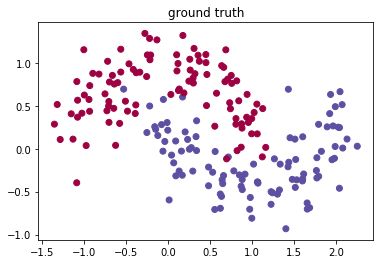

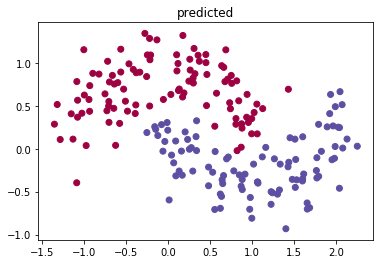

In [9]:
# predict results & plot results
y_res  = nn.forward(X)
y_pred = np.argmax(y_res, axis=1)

# plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("ground truth")
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Spectral)
plt.title("predicted")
plt.show()

## 9. In-depth analysis and problems

In [11]:
# print some results

print(y_res[1:10, :])

[[0.03154963 0.97354996]
 [0.30242346 0.68475421]
 [0.84429554 0.17625119]
 [0.04812804 0.95826417]
 [0.04183504 0.96405488]
 [0.80767817 0.17874873]
 [0.05463129 0.94906635]
 [0.83768873 0.14807047]
 [0.05043638 0.95552076]]


**问题**
1. We want to get the probability of each of these categories
2. How to do multiple classification problem？
3. How can you make neural network faster training good？
4. How to better construct the class definition of the network so that the class of the neural network supports more types of processing layer？

## References
* 反向传播算法
  * [零基础入门深度学习(3) - 神经网络和反向传播算法](https://www.zybuluo.com/hanbingtao/note/476663)
  * [Neural Network Using Python and Numpy](https://www.python-course.eu/neural_networks_with_python_numpy.php)
  * http://www.cedar.buffalo.edu/%7Esrihari/CSE574/Chap5/Chap5.3-BackProp.pdf
  * https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
